In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# sklearn :: models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# sklearn :: evaluation metrics
from sklearn.metrics import cohen_kappa_score

sns.set_style('whitegrid')

# Problem definition

Predict when a pet will be adopted

# Load the data

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(df_train.shape, df_test.shape)
df_train.dtypes

(10000, 24) (4993, 23)


Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

# Feature Engineering

In [3]:
print(df_train.columns)
df_train.head()

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,1,â¥â¥â¥ Lily â¥â¥â¥,36,307,0,2,2,7,0,2,...,1,1,0,41326,337914b09c2fa5460e195197e994ef98,0,Adorable 3 year old Lily looking for a forever...,3f8824a3b,1.0,4
1,2,Cookie,3,266,0,1,6,7,0,2,...,1,1,0,41327,4bb1ebb92158078ad54a6bb23c10dffc,0,i rescue this stary kitten from market near my...,9238eb7fc,1.0,2
2,2,Favour Speedy Abundance And Courage,7,250,252,1,1,2,0,2,...,1,4,0,41327,99ba8ce53b4d8515e417e7921563d923,0,The mother was a Burmese cross and had since p...,f0a1f2b90,2.0,4
3,1,NaN,3,307,0,1,2,0,0,3,...,1,1,0,41327,3f3ef74c486beba3bc87f6dbaee772bf,0,This puppy is: 1. Male 2. 3 months old 3. Brow...,7d028bdea,4.0,2
4,2,Abandoned Kitty,1,266,0,1,1,6,7,1,...,1,1,0,41401,844f03ab8054007d4be6686f3a9702b9,0,Mother cat gave birth to a litter of 3 and too...,8377bfe97,0.0,2


In [4]:
# Check for missing values
df_train.isnull().sum(axis = 0)

Type               0
Name             842
Age                0
Breed1             0
Breed2             0
Gender             0
Color1             0
Color2             0
Color3             0
MaturitySize       0
FurLength          0
Vaccinated         0
Dewormed           0
Sterilized         0
Health             0
Quantity           0
Fee                0
State              0
RescuerID          0
VideoAmt           0
Description        8
PetID              0
PhotoAmt           0
AdoptionSpeed      0
dtype: int64

In [5]:
# apply dummies on the training set
# create a loop to transform the categorical columns to numerical on the train set
for col in ['Type', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health']:
    df_dummies_train = pd.get_dummies(df_train[col], prefix=col)
    df_train = pd.concat([df_train, df_dummies_train], axis=1)
    # Remove the original columns
    del df_train[col]
df_train.head()

## create a loop to transform the categorical columns to numerical on the test set
for col in ['Type', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health']:
    df_dummies_test = pd.get_dummies(df_test[col], prefix=col)
    df_test = pd.concat([df_test, df_dummies_test], axis=1)
    # Remove the original columns
    del df_test[col]
df_test.head()

,Name,Age,Breed1,Breed2,Color1,Color2,Color3,Quantity,Fee,State,...,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3
0,Sincan,1,266,266,1,7,0,1,0,41326,...,0,0,1,0,0,1,0,1,0,0
1,Zone A2 P16,6,307,0,2,0,0,1,0,41326,...,0,1,0,0,0,1,0,1,0,0
2,Pixie,2,307,0,3,0,0,1,0,41401,...,1,1,0,0,0,1,0,1,0,0
3,Bullet,10,128,0,7,0,0,1,0,41326,...,0,1,0,0,0,1,0,1,0,0
4,JACKSON,12,307,0,2,0,0,1,0,41326,...,0,1,0,0,1,0,0,1,0,0


In [6]:
print(df_train.columns)
print(df_test.columns)
df_train.dtypes

Index(['Name', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description',
       'PetID', 'PhotoAmt', 'AdoptionSpeed', 'Type_1', 'Type_2', 'Gender_1',
       'Gender_2', 'Gender_3', 'MaturitySize_1', 'MaturitySize_2',
       'MaturitySize_3', 'MaturitySize_4', 'FurLength_1', 'FurLength_2',
       'FurLength_3', 'Vaccinated_1', 'Vaccinated_2', 'Vaccinated_3',
       'Dewormed_1', 'Dewormed_2', 'Dewormed_3', 'Sterilized_1',
       'Sterilized_2', 'Sterilized_3', 'Health_1', 'Health_2', 'Health_3'],
      dtype='object')
Index(['Name', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3',
       'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description',
       'PetID', 'PhotoAmt', 'Type_1', 'Type_2', 'Gender_1', 'Gender_2',
       'Gender_3', 'MaturitySize_1', 'MaturitySize_2', 'MaturitySize_3',
       'MaturitySize_4', 'FurLength_1', 'FurLength_2', 'FurLength_3',
       'Vaccinated_1', 'Vaccinated_2', 'V

Name               object
Age                 int64
Breed1              int64
Breed2              int64
Color1              int64
Color2              int64
Color3              int64
Quantity            int64
Fee                 int64
State               int64
RescuerID          object
VideoAmt            int64
Description        object
PetID              object
PhotoAmt          float64
AdoptionSpeed       int64
Type_1              uint8
Type_2              uint8
Gender_1            uint8
Gender_2            uint8
Gender_3            uint8
MaturitySize_1      uint8
MaturitySize_2      uint8
MaturitySize_3      uint8
MaturitySize_4      uint8
FurLength_1         uint8
FurLength_2         uint8
FurLength_3         uint8
Vaccinated_1        uint8
Vaccinated_2        uint8
Vaccinated_3        uint8
Dewormed_1          uint8
Dewormed_2          uint8
Dewormed_3          uint8
Sterilized_1        uint8
Sterilized_2        uint8
Sterilized_3        uint8
Health_1            uint8
Health_2    

In [7]:
# feature engineering
# select the columns
X_columns = [x for x in df_train.columns if x != 'AdoptionSpeed' and df_train.loc[:,x].dtype != object]
y_column = ['AdoptionSpeed']

In [8]:
list(X_columns)

['Age',
 'Breed1',
 'Breed2',
 'Color1',
 'Color2',
 'Color3',
 'Quantity',
 'Fee',
 'State',
 'VideoAmt',
 'PhotoAmt',
 'Type_1',
 'Type_2',
 'Gender_1',
 'Gender_2',
 'Gender_3',
 'MaturitySize_1',
 'MaturitySize_2',
 'MaturitySize_3',
 'MaturitySize_4',
 'FurLength_1',
 'FurLength_2',
 'FurLength_3',
 'Vaccinated_1',
 'Vaccinated_2',
 'Vaccinated_3',
 'Dewormed_1',
 'Dewormed_2',
 'Dewormed_3',
 'Sterilized_1',
 'Sterilized_2',
 'Sterilized_3',
 'Health_1',
 'Health_2',
 'Health_3']

# Model Training

In [9]:
# split the data using sklearn

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (8000, 35)
y_train (8000, 1)
X_test (2000, 35)
y_test (2000, 1)


# Model Training / Evaluation - Using Split

In [10]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())    
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)
    results.append([m[0], precision, recall])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(10))
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(10))
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'precision', 'recall']
df_results = df_results.sort_values(by='precision', ascending=False)
df_results

MODEL Naive Bayes
[[  4  34   0   2  10]
 [ 26 282   0  21  68]
 [ 30 321   0  32 129]
 [ 24 286   0  29 105]
 [ 18 291   0  35 253]]
Precision 0.284
Recall 0.284

MODEL RandomForestClassifier10
[[  5  16  10   8  11]
 [  5 143 130  57  62]
 [  1 120 162 112 117]
 [  4  99 139  94 108]
 [  2  94 127  86 288]]
Precision 0.346
Recall 0.346
Feature Importance
           0         1
10  PhotoAmt  0.131653
0        Age  0.119325
3     Color1  0.080780
4     Color2  0.079395
1     Breed1  0.074727
8      State  0.066336
2     Breed2  0.047109
5     Color3  0.040413
7        Fee  0.036665
6   Quantity  0.034945

MODEL RandomForestClassifier100
[[  1  26  10   4   9]
 [  4 114 142  61  76]
 [  3  91 170  94 154]
 [  3  79 118 108 136]
 [  1  74  98  63 361]]
Precision 0.377
Recall 0.377
Feature Importance
           0         1
10  PhotoAmt  0.133818
0        Age  0.125893
4     Color2  0.080627
3     Color1  0.078228
1     Breed1  0.068889
8      State  0.061947
2     Breed2  0.050224
7      

,model,precision,recall
2,RandomForestClassifier100,0.377,0.377
1,RandomForestClassifier10,0.346,0.346
4,DecisionTreeClassifier,0.318,0.318
3,KNeighborsClassifier,0.307,0.307
0,Naive Bayes,0.284,0.284


# Model Training / Evaluation - Cross Validation

MODEL Naive Bayes
MODEL RandomForestClassifier10
MODEL RandomForestClassifier100
MODEL KNeighborsClassifier
MODEL DecisionTreeClassifier


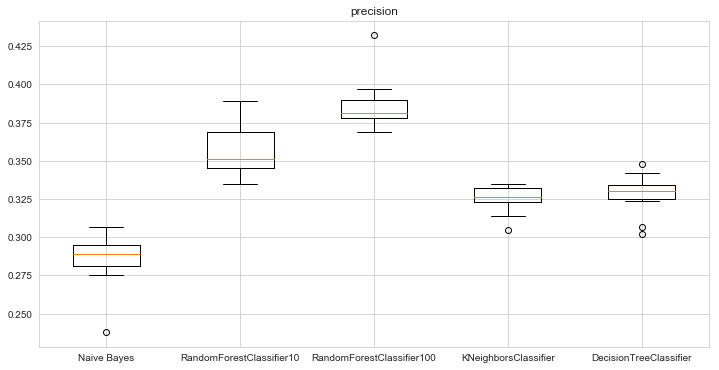

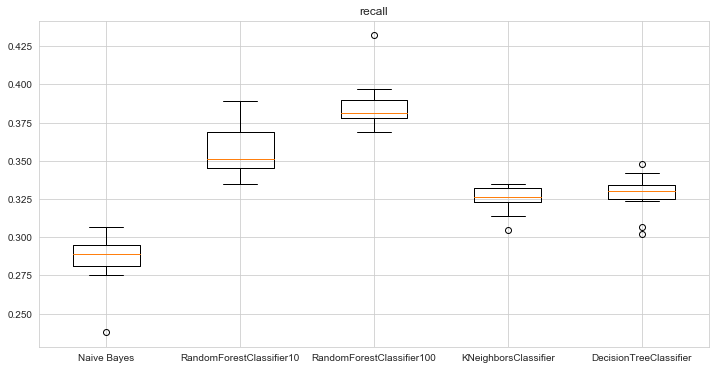

In [11]:
k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'precision':[], 'recall':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred, average='micro')
        recall = recall_score(y_test, y_pred, average='micro')
        results[m[0]]['precision'].append(precision)
        results[m[0]]['recall'].append(recall)
for metric in ['precision', 'recall']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

# Tuning the Thresholds

In [12]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
for i in range(1,10):
    print(i)
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred = [1 if x > i/10.0 else 0 for x in y_pred]
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)

/home/coastrock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1
[[  3  13   0   0   0]
 [ 30 163   0   0   0]
 [ 58 221   0   0   0]
 [ 82 143   0   0   0]
 [128 159   0   0   0]]
Precision 0.166
Recall 0.166
2
[[  5  11   0   0   0]
 [ 83 110   0   0   0]
 [120 159   0   0   0]
 [149  76   0   0   0]
 [200  87   0   0   0]]
Precision 0.115
Recall 0.115
3
[[  9   7   0   0   0]
 [133  60   0   0   0]
 [198  81   0   0   0]
 [187  38   0   0   0]
 [251  36   0   0   0]]
Precision 0.069
Recall 0.069
4
[[ 12   4   0   0   0]
 [163  30   0   0   0]
 [242  37   0   0   0]
 [209  16   0   0   0]
 [271  16   0   0   0]]
Precision 0.042
Recall 0.042
5
[[ 15   1   0   0   0]
 [180  13   0   0   0]
 [271   8   0   0   0]
 [213  12   0   0   0]
 [280   7   0   0   0]]
Precision 0.028
Recall 0.028
6
[[ 16   0   0   0   0]
 [188   5   0   0   0]
 [274   5   0   0   0]
 [219   6   0   0   0]
 [283   4   0   0   0]]
Precision 0.021
Recall 0.021
7
[[ 16   0   0   0   0]
 [192   1   0   0   0]
 [278   1   0   0   0]
 [223   2   0   0   0]
 [286   1   0   0   0]]


# Prepare your submission

In [13]:
df_prediction = df_test[X_columns]
df_test['AdoptionSpeed'] = model.predict(df_prediction)
df_test[['PetID', 'AdoptionSpeed']]

,PetID,AdoptionSpeed
0,f42161740,2
1,0118db3a8,4
2,e5164d828,2
3,5335bfb38,1
4,ff2cf88a0,3
5,1d13441b9,3
6,7d835cf7c,3
7,577d15fea,4
8,91736f444,4
9,db194aec8,1


In [14]:
df_test[['PetID', 'AdoptionSpeed']].to_csv('submission_knn.csv', index=False)